# Sales Analysis

### Import necessary libraries

In [1]:
import sys
!{sys.executable} -m pip install os
!{sys.executable} -m pip install pandas
import os
import pandas as pd
import seaborn as sns

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


### Merge data from each month into one CSV

In [2]:
%pwd

'C:\\Users\\giuli\\Docs\\Useful Docs\\Anaconda\\jupyter_notebook_case_study\\sales_data_science\\SalesAnalysis'

In [3]:
help(pd.read_csv) # or use the shortcut shift+tab to have a pop-up|

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [4]:
sales_april = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
sales_april.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
all_months_data = pd.DataFrame()  # create empty dataframe

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)  # save the df into a csv

### Read in updated dataframe

In [7]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
df.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

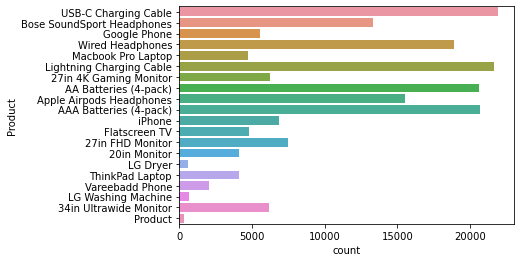

In [9]:
sns.countplot(y='Product', data=df)

### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### Drop rows of NAN

In [10]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
missing_data = df.isnull()
missing_data.sum().head()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
dtype: int64

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Order ID
False    186305
True        545
Name: Order ID, dtype: int64

Product
False    186305
True        545
Name: Product, dtype: int64

Quantity Ordered
False    186305
True        545
Name: Quantity Ordered, dtype: int64

Price Each
False    186305
True        545
Name: Price Each, dtype: int64

Order Date
False    186305
True        545
Name: Order Date, dtype: int64

Purchase Address
False    186305
True        545
Name: Purchase Address, dtype: int64



In [13]:
df = df.dropna(how='all')
# df.dropna(subset=["Order Date"], axis=0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Order ID
False    186305
Name: Order ID, dtype: int64

Product
False    186305
Name: Product, dtype: int64

Quantity Ordered
False    186305
Name: Quantity Ordered, dtype: int64

Price Each
False    186305
Name: Price Each, dtype: int64

Order Date
False    186305
Name: Order Date, dtype: int64

Purchase Address
False    186305
Name: Purchase Address, dtype: int64



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [16]:
df['Quantity Ordered'].describe()

count     186305
unique        10
top            1
freq      168552
Name: Quantity Ordered, dtype: object

In [17]:
df.describe(include = "all")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


#### Get rid of duplicated column headers throughout the df

In [18]:
help(pd.unique)

Help on function unique in module pandas.core.algorithms:

unique(values)
    Hash table-based unique. Uniques are returned in order
    of appearance. This does NOT sort.
    
    Significantly faster than numpy.unique. Includes NA values.
    
    Parameters
    ----------
    values : 1d array-like
    
    Returns
    -------
    numpy.ndarray or ExtensionArray
    
        The return can be:
    
        * Index : when the input is an Index
        * Categorical : when the input is a Categorical dtype
        * ndarray : when the input is a Series/ndarray
    
        Return numpy.ndarray or ExtensionArray.
    
    See Also
    --------
    Index.unique
    Series.unique
    
    Examples
    --------
    >>> pd.unique(pd.Series([2, 1, 3, 3]))
    array([2, 1, 3])
    
    >>> pd.unique(pd.Series([2] + [1] * 5))
    array([2, 1])
    
    >>> pd.unique(pd.Series([pd.Timestamp('20160101'),
    ...                     pd.Timestamp('20160101')]))
    array(['2016-01-01T00:00:00.0000

In [19]:
df['Order Date'].sort_values(ascending=False).unique()

array(['Order Date', '12/31/19 23:53', '12/31/19 23:52', ...,
       '01/01/19 04:56', '01/01/19 03:40', '01/01/19 03:07'], dtype=object)

In [20]:
df[df['Order Date'].str.contains('Order Date')].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64

In [21]:
df = df[df['Order Date'].str[0:2]!='Or']  # delete rows containing headers
df[df['Order Date'].str.contains('Order Date')].count()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Rename columns

In [22]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [23]:
df.rename(columns={"Order ID": "order_id", "Product": "product", "Quantity Ordered": "qta_ordered", "Price Each": "price_each", "Order Date": "order_date", "Purchase Address": "purchase_address"}, inplace=True)

list(df.columns.values)

['order_id',
 'product',
 'qta_ordered',
 'price_each',
 'order_date',
 'purchase_address']

### Cast columns correct type

In [24]:
df.dtypes

order_id            object
product             object
qta_ordered         object
price_each          object
order_date          object
purchase_address    object
dtype: object

In [25]:
df['qta_ordered'] = pd.to_numeric(df['qta_ordered'])
df['price_each'] = pd.to_numeric(df['price_each'])

### Augment data with additional columns

#### Add month column

In [26]:
df['month'] = df['order_date'].str[0:2]
# df['Month'] = pd.to_datetime(df['Order Date']).dt.month  # alternative way
df.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
df['month'] = df['month'].astype('int32')  # cast the month column to integer
df.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [28]:
list(df.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('int32')]

## Data Exploration!

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn

In [30]:
corrMatrix = df.corr()
corrMatrix

,qta_ordered,price_each,month
qta_ordered,1.000000,-0.148272,0.000791
price_each,-0.148272,1.000000,-0.003375
month,0.000791,-0.003375,1.000000


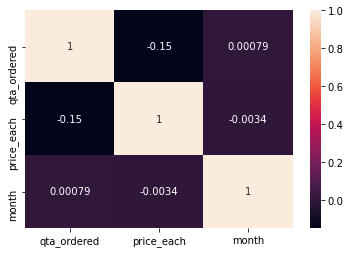

In [31]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [32]:
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(3)

,qta_ordered,price_each,month
qta_ordered,1.000,-0.148,0.001
price_each,-0.148,1.000,-0.003
month,0.001,-0.003,1.000


## Question 1: What was the best month for sales? How much was earned that month? 

In [33]:
df['Sales'] = df['qta_ordered'].astype('int') * df['price_each'].astype('float')

In [34]:
df.drop(columns = "Sales", inplace = True)
df.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [35]:
df['sales'] = df['qta_ordered'].astype('int') * df['price_each'].astype('float')

In [36]:
df.groupby(['month']).sum().sort_values(by= "sales", ascending = False)

,qta_ordered,price_each,sales
month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


In [37]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

range(1, 13)


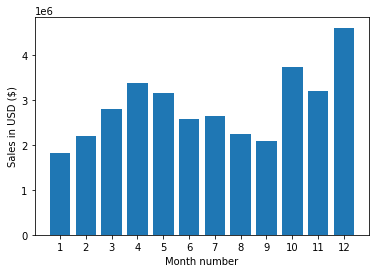

In [38]:
plt.bar(months,df.groupby(['month']).sum()['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Question 2: What city sold the most product?

### Add city column

In [39]:
df["purchase_address"].head(2).to_string().split(",")[1]

' Dallas'

In [40]:
df["purchase_address"].head(2).to_string().split(",")[0:2]

['0         917 1st St', ' Dallas']

In [41]:
df['city'] = df['purchase_address'].apply(lambda x: x.split(',')[1])
df.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [42]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [43]:
df['city'] = df['purchase_address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [44]:
list(df["city"].unique())

['Dallas  (TX)',
 'Boston  (MA)',
 'Los Angeles  (CA)',
 'San Francisco  (CA)',
 'Seattle  (WA)',
 'Atlanta  (GA)',
 'New York City  (NY)',
 'Portland  (OR)',
 'Austin  (TX)',
 'Portland  (ME)']

In [45]:
df.groupby(['city']).sum().sort_values(by= "sales", ascending = False)

,qta_ordered,price_each,month,sales
city,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


In [46]:
# df.loc[(df['city'].str.upper() == 'DALLAS (TX)') || df['product'].str.upper() == 'GOOGLE PHONE']

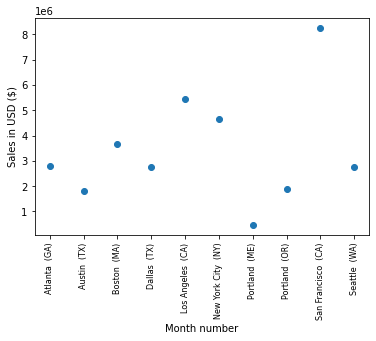

In [47]:
keys = [city for city, df in df.groupby(['city'])]

plt.scatter(keys,df.groupby(['city']).sum()['sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [48]:
df.groupby(['qta_ordered','order_date']).sum().sort_values(by = "sales", ascending = False)

price_each  month    sales
qta_ordered order_date                                
1           04/22/19 13:26     4017.94     20  4017.94
            04/25/19 19:01     3723.88     20  3723.88
            05/09/19 19:46     3700.00     15  3700.00
            12/06/19 16:10     3686.88     72  3686.88
            10/27/19 21:14     3499.99     30  3499.99
...                                ...    ...      ...
            12/17/19 17:31        2.99     12     2.99
            09/29/19 21:19        2.99      9     2.99
            07/28/19 21:31        2.99      7     2.99
            07/28/19 21:35        2.99      7     2.99
            11/29/19 12:52        2.99     11     2.99

[148788 rows x 3 columns]

In [49]:
df.dtypes

order_id             object
product              object
qta_ordered           int64
price_each          float64
order_date           object
purchase_address     object
month                 int32
sales               float64
city                 object
dtype: object

In [50]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   qta_ordered       185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   sales             185950 non-null  float64       
 8   city              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


In [52]:
# Add hour column
df['hour'] = pd.to_datetime(df['order_date']).dt.hour
df['minute'] = pd.to_datetime(df['order_date']).dt.minute
df['row_number'] = 1
df.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute,row_number
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [53]:
df.groupby(['hour']).count()["row_number"].to_frame().sort_values(by = "row_number", ascending = False)

,row_number
hour,
19,12905
12,12587
11,12411
18,12280
20,12228
13,12129
14,10984
10,10944
21,10921


In [59]:
# keys = [pair for pair, df in df.groupby(['hour'])]

# plt.plot(keys, df.groupby(['hour']).count_values()['count'])
# plt.xticks(keys)
# plt.grid()
# plt.show()

# My recommendation is slightly before 11am or 7pm

SyntaxError: invalid syntax (<ipython-input-59-ef32341121e4>, line 4)

## Question 4: What products are most often sold together?

In [61]:
# df.drop(columns="count",inplace=True)

In [62]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df1 = df[df['order_id'].duplicated(keep=False)]
df1.head()

,order_id,product,qta_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute,row_number
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1


In [63]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df1['grouped'] = df.groupby('order_id')['product'].transform(lambda x: ','.join(x))
df2 = df1[['order_id', 'grouped']].drop_duplicates()

<ipython-input-63-dc1cd8a1e11c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['grouped'] = df.groupby('order_id')['product'].transform(lambda x: ','.join(x))


In [64]:
df2.head()

,order_id,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [65]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  # most sold pair of products

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [66]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [67]:
product_group = df.groupby('product')
quantity_ordered = product_group.sum()['qta_ordered']

quantity_ordered.to_frame().sort_values(by = 'qta_ordered')

,qta_ordered
product,
LG Dryer,646
LG Washing Machine,666
Vareebadd Phone,2068
20in Monitor,4129
ThinkPad Laptop,4130
Macbook Pro Laptop,4728
Flatscreen TV,4819
Google Phone,5532
34in Ultrawide Monitor,6199


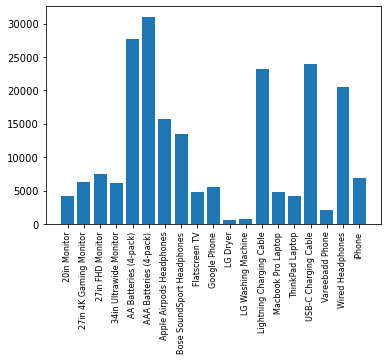

In [68]:
keys = [pair for pair, df in product_group]

plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [69]:
prices = df.groupby('product').mean()['price_each']
prices.head()

product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: price_each, dtype: float64

<ipython-input-70-7f336dd0bab2>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


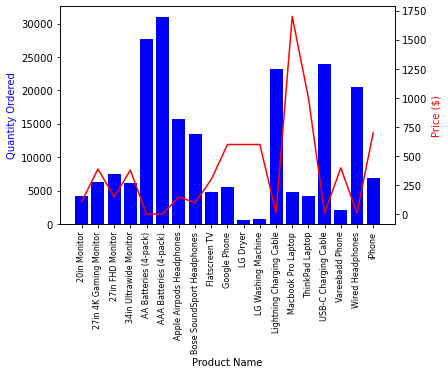

In [70]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='b')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()